In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.colors as mcolors
import os

In [90]:
# Define the folder paths
ig_stuff_folder = 'ig_stuff'
images_folder = os.path.join(ig_stuff_folder, 'images')

# Check if the ig_stuff folder exists, if not, create it
if not os.path.exists(ig_stuff_folder):
    os.makedirs(ig_stuff_folder)
    print(f"Created folder: {ig_stuff_folder}")

# Check if the images folder exists inside ig_stuff, if not, create it
if not os.path.exists(images_folder):
    os.makedirs(images_folder)
    print(f"Created folder: {images_folder}")

print("Directory structure is set up.")

Directory structure is set up.


In [68]:
def add_cluster(df):
    # Define the lat_long_to_cluster dictionary
    lat_long_to_cluster = {
        (46.13, 10.18): 1, (46.13, 10.34): 1, (46.13, 10.5): 1, (46.13, 10.66): 1, (46.13, 10.82): 3, (46.13, 10.99): 3, (46.13, 11.15): 3, (46.13, 11.31): 3, (46.13, 11.47): 3, (46.13, 11.64): 3, (46.13, 11.8): 0, (46.13, 11.96): 0, (46.13, 12.12): 0, (46.13, 12.28): 0, (46.24, 10.18): 1, (46.24, 10.34): 1, (46.24, 10.5): 1, (46.24, 10.66): 1, (46.24, 10.82): 1, (46.24, 10.99): 3, (46.24, 11.15): 3, (46.24, 11.31): 3, (46.24, 11.47): 3, (46.24, 11.64): 3, (46.24, 11.8): 0, (46.24, 11.96): 0, (46.24, 12.12): 0, (46.24, 12.28): 0, (46.35, 10.18): 1, (46.35, 10.34): 1, (46.35, 10.5): 1, (46.35, 10.66): 1, (46.35, 10.82): 1, (46.35, 10.99): 3, (46.35, 11.15): 3, (46.35, 11.31): 3, (46.35, 11.47): 3, (46.35, 11.64): 0, (46.35, 11.8): 0, (46.35, 11.96): 0, (46.35, 12.12): 0, (46.35, 12.28): 0, (46.47, 10.18): 1, (46.47, 10.34): 1, (46.47, 10.5): 1, (46.47, 10.66): 1, (46.47, 10.82): 1, (46.47, 10.99): 3, (46.47, 11.15): 3, (46.47, 11.31): 3, (46.47, 11.47): 3, (46.47, 11.64): 0, (46.47, 11.8): 0, (46.47, 11.96): 0, (46.47, 12.12): 0, (46.47, 12.28): 0, (46.58, 10.18): 1, (46.58, 10.34): 1, (46.58, 10.5): 1, (46.58, 10.66): 1, (46.58, 10.82): 1, (46.58, 10.99): 3, (46.58, 11.15): 3, (46.58, 11.31): 3, (46.58, 11.47): 3, (46.58, 11.64): 0, (46.58, 11.8): 0, (46.58, 11.96): 0, (46.58, 12.12): 0, (46.58, 12.28): 0, (46.69, 10.18): 1, (46.69, 10.34): 1, (46.69, 10.5): 1, (46.69, 10.66): 1, (46.69, 10.82): 1, (46.69, 10.99): 2, (46.69, 11.15): 3, (46.69, 11.31): 2, (46.69, 11.47): 2, (46.69, 11.64): 0, (46.69, 12.12): 0, (46.69, 12.28): 0, (46.8, 10.18): 1, (46.8, 10.34): 1, (46.8, 10.5): 1, (46.8, 10.66): 1, (46.8, 10.82): 2, (46.8, 10.99): 2, (46.8, 11.15): 2, (46.8, 11.31): 2, (46.8, 11.47): 2, (46.8, 11.64): 0, (46.8, 12.12): 0, (46.8, 12.28): 0, (46.92, 10.18): 1, (46.92, 10.34): 1, (46.92, 10.5): 1, (46.92, 10.66): 1, (46.92, 10.82): 2, (46.92, 10.99): 2, (46.92, 11.15): 2, (46.92, 11.31): 2, (46.92, 11.47): 2, (46.92, 11.64): 2, (46.92, 12.12): 0, (46.92, 12.28): 0, (47.03, 10.18): 1, (47.03, 10.34): 1, (47.03, 10.5): 1, (47.03, 10.66): 2, (47.03, 10.82): 2, (47.03, 10.99): 2, (47.03, 11.15): 2, (47.03, 11.31): 2, (47.03, 11.47): 2, (47.03, 11.64): 2, (47.03, 12.12): 0, (47.03, 12.28): 0, (47.14, 10.18): 1, (47.14, 10.34): 1, (47.14, 10.5): 1, (47.14, 10.66): 2, (47.14, 10.82): 2, (47.14, 10.99): 2, (47.14, 11.15): 2, (47.14, 11.31): 2, (47.14, 11.47): 2, (47.14, 11.64): 2, (47.14, 11.8): 0, (47.14, 11.96): 0, (47.14, 12.12): 0, (47.14, 12.28): 0, (46.92, 11.96): 0, (46.69, 11.8): 0, (46.69, 11.96): 0, (46.8, 11.8): 0, (46.8, 11.96): 0, (46.92, 11.8): 0, (47.03, 11.8): 0, (47.03, 11.96): 0
        }

    # Function to map (latitude, longitude) pairs to cluster values
    def map_lat_long_to_cluster(row):
        lat_long_pair = (row['Latitude'], row['Longitude'])
        return lat_long_to_cluster.get(lat_long_pair, None)

    # Add the 'cluster' column to the DataFrame
    df['cluster'] = df.apply(lambda row: map_lat_long_to_cluster(row), axis=1)

    return df

In [ ]:
future_type_array = ["_near_future", "_mid_future", "_far_future"]
future_type_array = ["_mid_future", "_far_future"]
for j in future_type_array:
    for i in range(4):
        x = plot_monthly_avg(future_type= j, cluster_name=i)
x

In [91]:
def plot_clusters_solid_colours(save):
# Load the provided CSV file
    df_main = pd.read_csv("./dummy_df.csv")
    df_full = df_main

    # Define the grid
    latitudes = np.sort(df_full['Latitude'].unique())
    longitudes = np.sort(df_full['Longitude'].unique())
    grid = np.full((len(latitudes), len(longitudes)), -1)

    # Fill the grid with cluster values
    for _, row in df_full.iterrows():
        lat_idx = np.where(latitudes == row['Latitude'])[0][0]
        lon_idx = np.where(longitudes == row['Longitude'])[0][0]
        grid[lat_idx, lon_idx] = row['cluster']

    # Plot using pcolormesh
    plt.figure(figsize=(10, 6))
    cmap = plt.get_cmap('viridis', 4)  # Get a colormap with 4 discrete colors
    mesh = plt.pcolormesh(longitudes, latitudes, grid, cmap=cmap, shading='auto')

    shapefile_data = gpd.read_file(r'.\adigeshp\Export_Output2.shp')
    shapefile_data = gpd.read_file(r'.\adigeshp\Export_Output2.shp')

    shapefile_data.plot(ax=plt.gca(), facecolor="none", edgecolor="black", linewidth=0.8)


    # Create discrete legend
    from matplotlib.patches import Patch
    legend_labels = ['0', '1', '2', '3']
    colors = [cmap(i) for i in range(4)]
    patches = [Patch(color=colors[i], label=legend_labels[i]) for i in range(4)]
    plt.legend(handles=patches, title="Clusters", bbox_to_anchor=(1, 1), loc='upper left')

    # Add titles and labels
    plt.title("Spatial Distribution of Clusters")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.ylim(min(np.unique(df_main["Latitude"])-0.05), max(np.unique(df_main["Latitude"])+0.05))
    if save == 1:
        plt.savefig(f'./ig_stuff/images/spatial_clusters.png', dpi=300)  # Set dpi for better quality if needed
    # Show the plot
    plt.show()


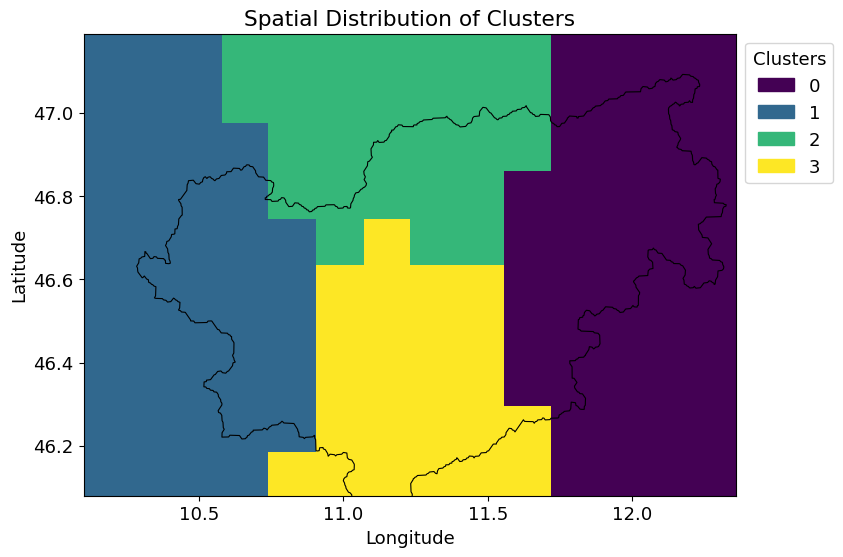

In [92]:
plot_clusters_solid_colours(0)

In [87]:
cluster_name = 3
# future_type = ""
# scenario_array = ["rcp26", "rcp45", "rcp85"]
def plot_val_vs_observed(average="m", cluster_name="all", save=0):
    df = pd.read_csv("./ig_stuff/val_vs_predicted.csv")
    if cluster_name != "all":
        df = add_cluster(df)
        df = df[df['cluster'] == cluster_name]

    df['Date'] = pd.to_datetime(df['Date'])
    if average=="m":
    # Average monthly
        df['Date'], scale = df['Date'].dt.strftime(f'%Y-%m',), "Average monthly"
    elif average == "d":
        df['Date'], scale = df['Date'].dt.strftime(f'%Y-%m-%d',), "Average daily"

    df= df.groupby('Date')[["Observed", "Predicted"]].mean().reset_index()
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date')

    fig = px.line(df, x="Date" , y=["Predicted","Observed"])
    fig.update_layout(title=f'{scale} |cc Cluster {cluster_name}' , width = 1800, height = 400)
    fig.update_yaxes(title_text='NDSI')
    if save == 1:
        fig.write_image(fr'./ig_stuff/images/avg_{average}_cluster_{cluster_name}.png', scale = 300/72)
    fig.show()

In [88]:
plot_val_vs_observed("m",1,1)

c:\Users\suvam\miniconda3\envs\tensorflow_env\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [73]:
# this doesn't work as well, need to delete
def plot_clusters(df, column_to_plot):
    # Plot clusters with larger scatter dots
    scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df[column_to_plot], cmap='viridis', marker='.', s=1000) # Adjust the 's' parameter to increase the size of dots

    shapefile_data = gpd.read_file(r'.\adigeshp\Export_Output2.shp')
    shapefile_data = shapefile_data.cx[:, :46.0]
    shapefile_data.plot(ax=plt.gca(), alpha=0.5, color="black")
    # Add legend
    legend = plt.legend(*scatter.legend_elements(), title='Clusters',  bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Clustered Points')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.ylim(min(np.unique(df["Latitude"])-0.12), max(np.unique(df["Latitude"])+0.12))
    plt.savefig(f'./ig_stuff/images/check2.png', dpi=300)
    plt.show()


In [74]:
future_dictionary = {"_near_future": "Near Future (2021 - 2030)",
           "_mid_future": "Mid Future (2046-2055)",
            "_far_future": "Far Future (2091-2100)" }

In [75]:
def plot_monthly_avg(future_type, cluster_name, plot_legend=True):
    monthly_avg_array = []
    scenario_array = ["rcp26", "rcp45", "rcp85"]

    df = pd.read_csv(f".\ig_stuff\ig{future_type}_predictions.csv")
    df = add_cluster(df)
    
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    df = df[df['cluster'] == cluster_name]


    for scenario in scenario_array:
        # Calculate monthly average for each scenario
        monthly_avg = df.groupby('Month')[scenario].mean()
        monthly_avg_array.append(monthly_avg.values)

    # Plot all monthly averages on the same plot
    plt.figure(figsize=(10, 6))

    for monthly_avg_values in monthly_avg_array:
        plt.plot(range(1, 13), monthly_avg_values, marker='o')

    plt.title(f'Monthly Average NDSI | Cluster {cluster_name} | {future_dictionary[future_type]} ')
    plt.xlabel('Month')
    plt.ylabel('Average NDSI')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    plt.legend(scenario_array)
        
    plt.grid(True)
    plt.ylim(-0.05, 0.7)
    plt.savefig(f'./ig_stuff/images/monthwise_dist_{future_type}_cluster_{cluster_name}.png', dpi=300)
    plt.show()



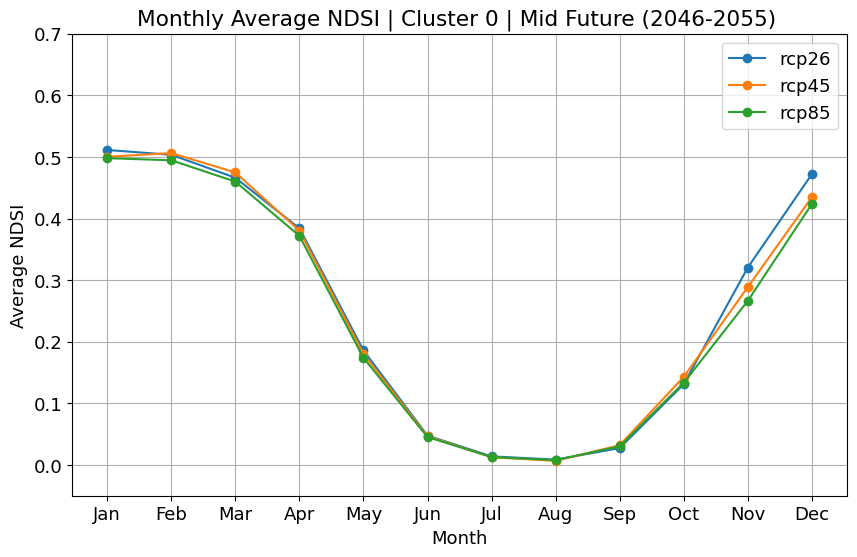

In [76]:
plot_monthly_avg("_mid_future", 0)

In [78]:
def plotting_100_years_average(cluster_name):
    combined_avg_values = pd.DataFrame()
    future_types = ["_near_future", "_mid_future", "_far_future"]
    for future_type in future_types:
        # Assuming your DataFrame is named df
        df = pd.read_csv(f".\ig_stuff\ig{future_type}_predictions.csv")
        # Extract year from the 'Date' column
        df['Year'] = pd.to_datetime(df['Date']).dt.year
        df = add_cluster(df)
        
        df = df[df['cluster'] == cluster_name]
        df['Month'] = pd.to_datetime(df['Date']).dt.month
        # df = df[df['Month'].isin([12])]


        min_year = df['Year'].min()
        max_year = df['Year'].max()
        bins = range(min_year, max_year + 3, 2)

        # Cut the years into the custom bins for 2-year intervals
        df['Year Group'] = pd.cut(df['Year'], bins=bins, right=False)

        avg_values = df.groupby('Year Group').agg({'rcp26': 'mean', 'rcp45': 'mean', 'rcp85': 'mean'})
        combined_avg_values = pd.concat([combined_avg_values, avg_values], axis=0)


    # Plotting the grouped bar graph
    combined_avg_values.plot(kind='bar', figsize=(20, 6))
    plt.title(f'Average NDSI Values by Scenario for Cluster {cluster_name}', fontsize=13)  # Update the title
    plt.xlabel('Interval Size', fontsize = 11)  # Update the xlabel
    plt.ylabel('NDSI Value', fontsize = 11)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Scenario', bbox_to_anchor=(1, 1), loc='upper left', fontsize=11)
    plt.tight_layout()
    plt.ylim(0,0.55)
    plt.savefig(f'./ig_stuff/images/average_ndsi_values_cluster_{cluster_name}.png', dpi=300)  # Set dpi for better quality if needed
    plt.show()


In [ ]:
for i in range(4):
    plotting_100_years_average(cluster_name=i)

In [8]:

def plot_percentage_change(cluster_name):
    combined_avg_values = pd.DataFrame()
    future_types = ["_near_future", "_mid_future", "_far_future"]
    scenario_array = ["rcp26", "rcp45", "rcp85"]

    for future_type in future_types:
        # Assuming your DataFrame is named df
        df = pd.read_csv(f".\ig_stuff\ig{future_type}_predictions.csv")
        # Extract year from the 'Date' column
        df['Year'] = pd.to_datetime(df['Date']).dt.year
        if cluster_name != "all":
            df = add_cluster(df)
            df = df[df['cluster'] == cluster_name]
        df['Month'] = pd.to_datetime(df['Date']).dt.month
        


        min_year = df['Year'].min()
        max_year = df['Year'].max()
        bins = range(min_year, max_year + 3, 2)

        # Cut the years into the custom bins for 2-year intervals
        df['Year Group'] = pd.cut(df['Year'], bins=bins, right=False)

        avg_values = df.groupby('Year Group', observed=False).agg({'rcp26': 'mean', 'rcp45': 'mean', 'rcp85': 'mean'})
        combined_avg_values = pd.concat([combined_avg_values, avg_values], axis=0)

    df2 = combined_avg_values.copy()
    scenario_array = ["rcp26", "rcp45", "rcp85"]
    for scenario in scenario_array:
        df2[f'change_{scenario}'] = ((df2[scenario] - df2["rcp26"].iloc[0]) / (df2["rcp26"].iloc[0])) * 100
    df2 = df2.drop(scenario_array, axis =1)
    df2 = df2.drop("change_rcp26", axis =1)

    df2.plot(kind='line')
    plt.title(f'Percentage change in NDSI by Scenario for Cluster {cluster_name}', fontsize=13)  # Update the title
    plt.xlabel('Interval Size', fontsize = 11)  # Update the xlabel
    plt.ylabel('Percentage change in NDSI', fontsize = 11)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Scenario', bbox_to_anchor=(1, 1), loc='upper left', fontsize=11)
    plt.tight_layout()
    plt.savefig(f'./ig_stuff/images/percentage_change_cluster_{cluster_name}.png', dpi=300)  # Set dpi for better quality if needed
    plt.show()


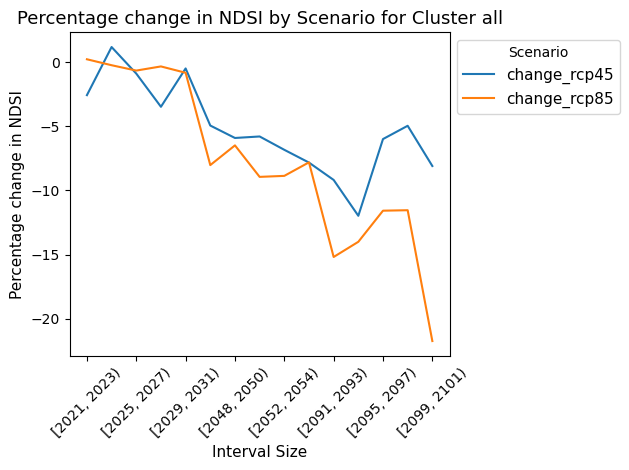

In [9]:
    # for i in range(1):
plot_percentage_change(cluster_name="all")

In [ ]:
def plot_spatial_ndsi(df, future_type, scenario):
    # Get unique latitude and longitude values
    latitudes = df['Latitude'].unique()
    longitudes = df['Longitude'].unique()

    # Create a 2D grid of NDSI values
    ndsi_values = df.pivot_table(index='Latitude', columns='Longitude', values='ndsi').values

    # Create a custom colormap from white to red
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "red"])

    # Create a heatmap using imshow with the custom colormap
    plt.figure(figsize=(10, 8))
    plt.imshow(ndsi_values, cmap=cmap, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()], origin='lower', vmin=0.15, vmax=0.5)

    # Load and plot the shapefile data
    shapefile_data = gpd.read_file(r'.\adigeshp\Export_Output2.shp')
    shapefile_data.plot(ax=plt.gca(), facecolor="none", edgecolor="black", linewidth=0.8)

    plt.title(f'{future_dictionary[future_type]} and Scenario {scenario}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Create a colorbar with custom ticks and labels
    cbar = plt.colorbar(label='NDSI')
    cbar.set_ticks([0.15,  0.3, 0.4, 0.5])  # Customize colorbar ticks
    cbar.set_ticklabels(['0.15', '0.3', '0.4', '0.5'])  # Customize colorbar tick labels

    plt.ylim(min(np.unique(df["Latitude"])), max(np.unique(df["Latitude"])))
    plt.xlim(min(np.unique(df["Longitude"])), max(np.unique(df["Longitude"])))

    plt.savefig(f'./ig_stuff/images/{future_type}_{scenario}.png', dpi=300)  # Set dpi for better quality if needed
    plt.show()


In [19]:
def plot_spatial_map_change(future_type, scenario):
    df = pd.read_csv(f".\ig_stuff\ig{future_type}_predictions.csv")
    df_main = pd.read_csv("./dummy_df.csv")
    df = add_cluster(df)
    
    avg_values = df.groupby('cluster', observed=False).agg({scenario: 'mean'})

    df_main = pd.merge(df_main, avg_values, how='left', left_on='cluster', right_index=True)
    df_main.rename(columns={scenario: 'ndsi'}, inplace=True)

    plot_spatial_ndsi(df_main, future_type, scenario)

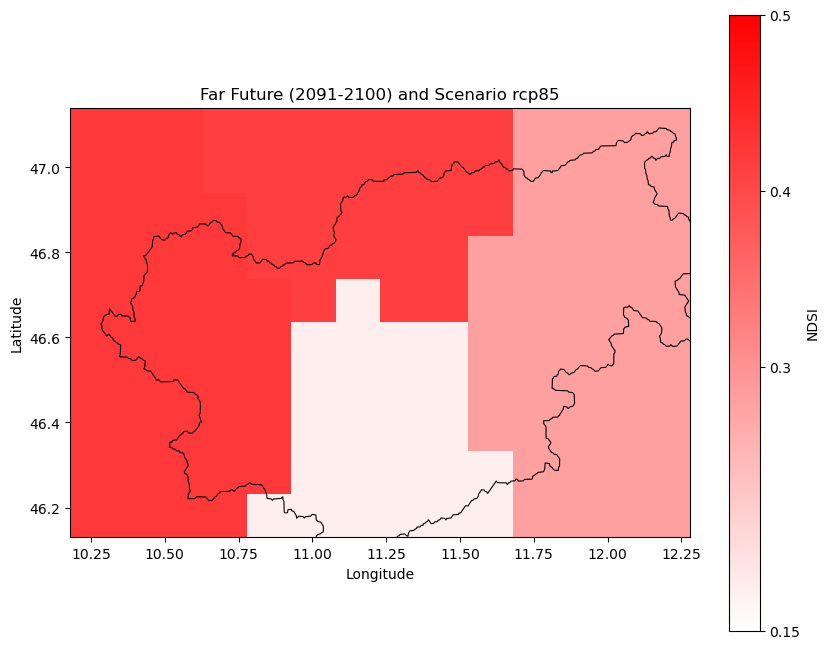

In [20]:
plot_spatial_map_change("_far_future", "rcp85")

In [47]:
def plot_box_monthwise_obs_pred(save):
    # Read the CSV file
    df = pd.read_csv("./ig_stuff/val_vs_predicted.csv")

    # Convert the 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract the month from the 'Date' column
    df['Month'] = df['Date'].dt.month

    # Reshape the dataframe to have 'Observed' and 'Predicted' in the same column
    df_long = pd.melt(df, id_vars=['Month'], value_vars=['Observed', 'Predicted'], var_name='Type', value_name='Value')

    # Create a box plot using seaborn
    plt.figure(figsize=(20, 8))  # Increase the figure size for better visibility
    ax = sns.boxplot(x='Month', y='Value', hue='Type', data=df_long, showfliers=False)

    # Improve plot aesthetics
    # plt.xticks(rotation=45)
    # x_labels = ax.get_xticklabels()

    # # Customize x-axis labels to show only the first month of each year or specific months
    # new_labels = [label.get_text() if i % 12 == 0 else '' for i, label in enumerate(x_labels)]  # Show label for the first month of each year
    # ax.set_xticklabels(new_labels)
    plt.rcParams.update({'font.size': 13}) 
    plt.xlabel('Month')
    plt.ylabel('NDSI')
    plt.title('Monthly Box Plot of Observed and Predicted Values for each Month')
    plt.grid(True)
    if save == 1:
        plt.savefig(f"/ig_stuff/images/monthwise_observed_vs_predicted.png", dpi=300)
    # Show the plot
    plt.show()


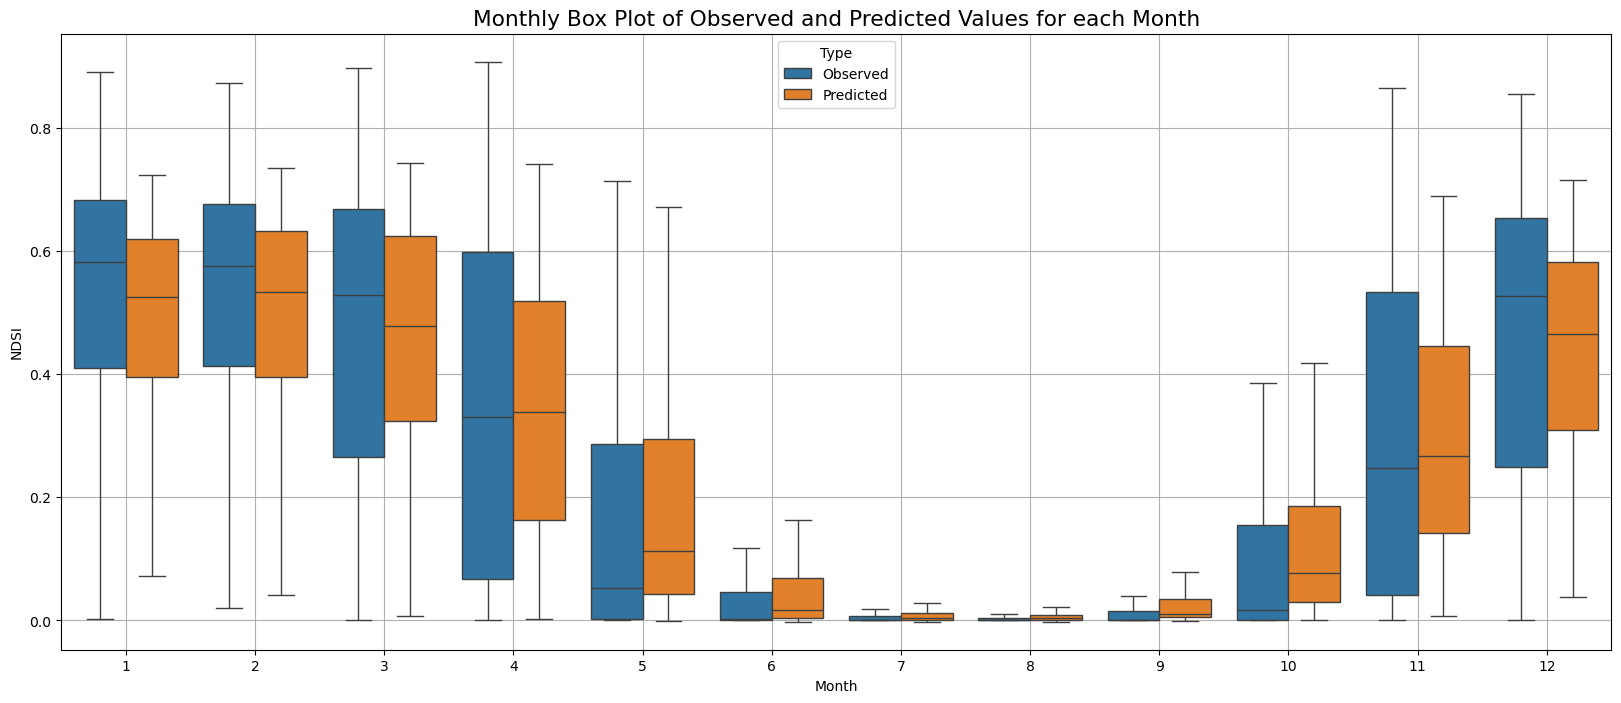

In [48]:
plot_box_monthwise_obs_pred(0)

In [52]:
# bookmark

def plot_box_yearwise(plot_what, save):
    # Read the CSV file
    df = pd.read_csv("./ig_stuff/val_vs_predicted.csv")

    # Convert the 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract the year and month and create a new column for 'YearMonth'
    df['YearMonth'] = df['Date'].dt.to_period('M')

    # Create a box plot using seaborn, specifying 'YearMonth' for unique month/year combinations
    plt.figure(figsize=(20, 8))  # Increase the figure size for better visibility
    ax = sns.boxplot(x='YearMonth', y=plot_what, data=df, showfliers=False)  # Set showfliers to False to hide outliers

    # Set x-axis label rotation and frequency
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    x_labels = ax.get_xticklabels()  # Get all x labels

    # Customize x-axis labels to show only the first month of each year or specific months
    new_labels = [label.get_text() if i % 12 == 0 else '' for i, label in enumerate(x_labels)]  # Show label for the first month of each year
    ax.set_xticklabels(new_labels)

    plt.xlabel('Year')
    plt.ylim(-0.05, 0.9)
    plt.ylabel('NDSI')
    plt.title(f'Monthly Box Plot of {plot_what} NDSI Values')
    plt.grid(True)
    if save ==1:
        plt.savefig(f"./ig_stuff/images/year_wise_{plot_what}.png", dpi=300)
    # Show the plot
    plt.show()


C:\Users\suvam\AppData\Local\Temp\ipykernel_26044\3721255095.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



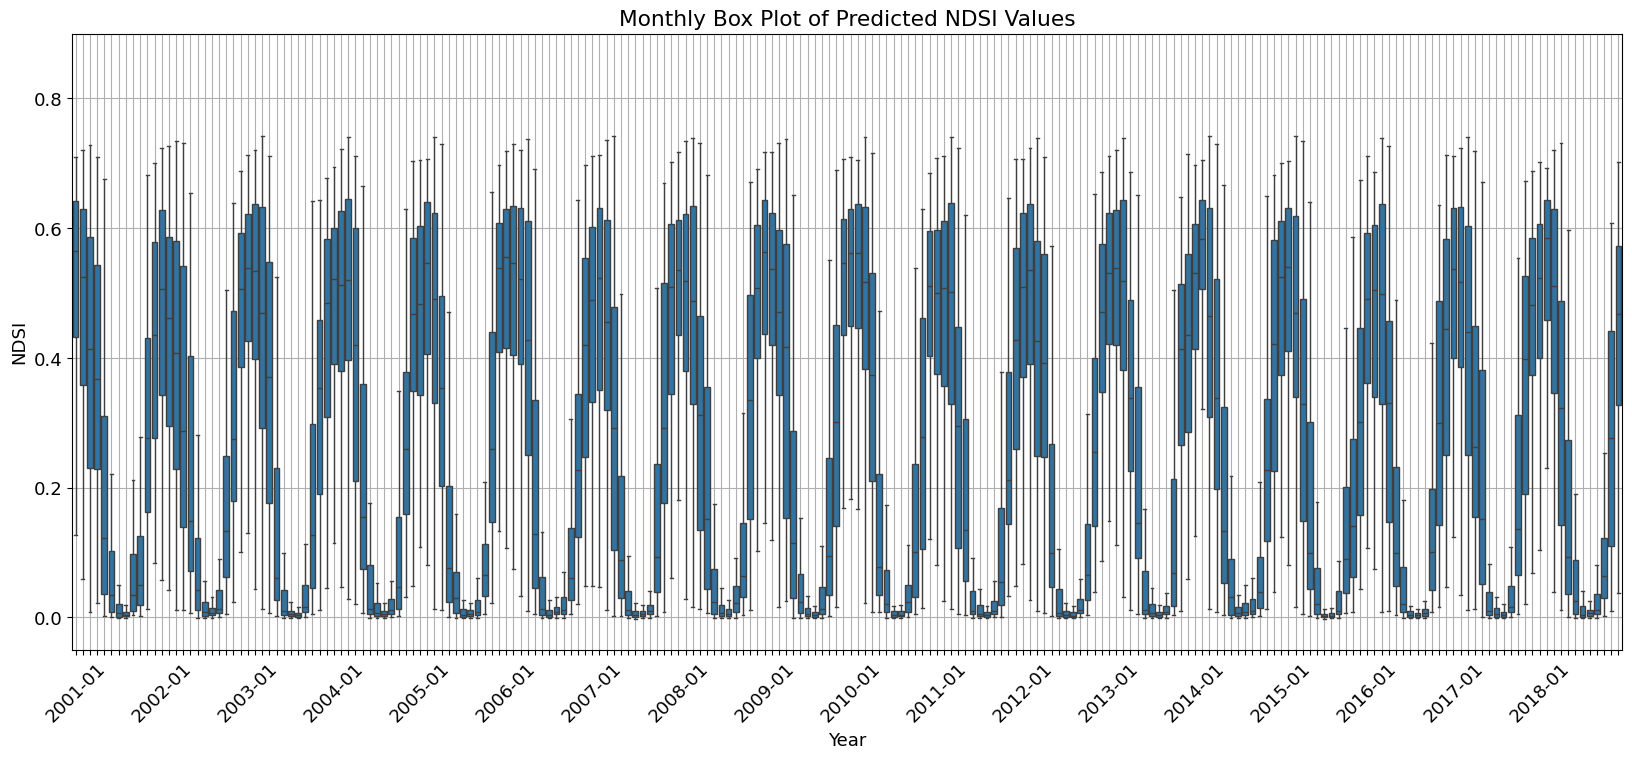

In [53]:
plot_box_yearwise("Predicted", 0)

C:\Users\suvam\AppData\Local\Temp\ipykernel_26044\3721255095.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



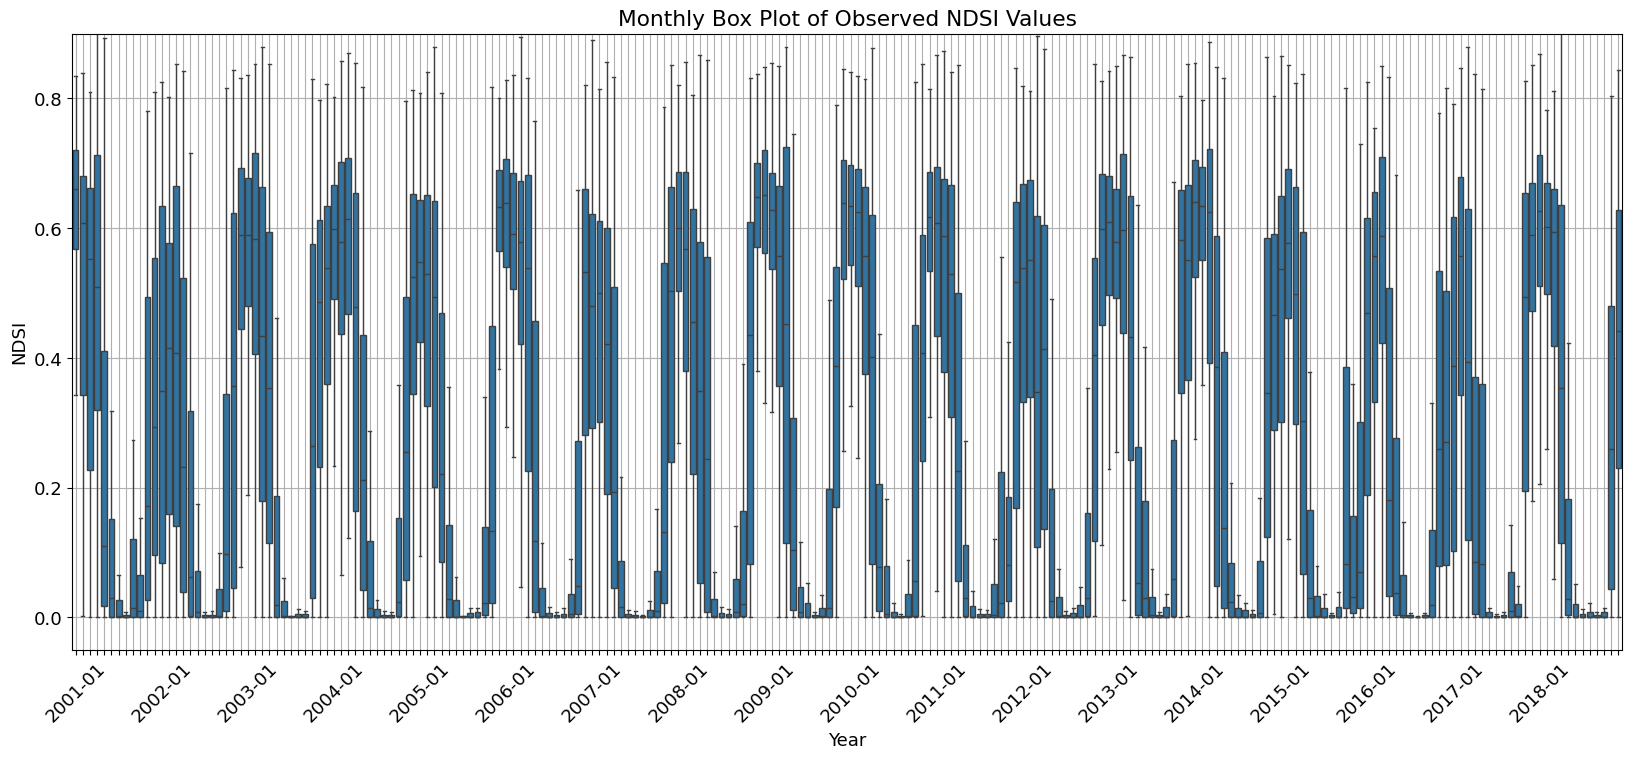

In [63]:
plot_box_yearwise("Observed", 0)

In [61]:
def plot_box_yearwise_obs_pred(save):
    # Read the CSV file
    df = pd.read_csv("./ig_stuff/val_vs_predicted.csv")

    # Convert the 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract the year and month and create a new column for 'YearMonth'
    df['YearMonth'] = df['Date'].dt.to_period('M')

    # Reshape the dataframe to have 'Observed' and 'Predicted' in the same column
    df_long = pd.melt(df, id_vars=['YearMonth'], value_vars=['Observed', 'Predicted'], var_name='Type', value_name='Value')

    # Create a box plot using seaborn
    plt.figure(figsize=(20, 8))  # Increase the figure size for better visibility
    ax = sns.boxplot(x='YearMonth', y='Value', hue='Type', data=df_long, showfliers=False)

    # Improve plot aesthetics
    plt.xticks(rotation=45)
    x_labels = ax.get_xticklabels()

    # Customize x-axis labels to show only the first month of each year or specific months
    new_labels = [label.get_text() if i % 12 == 0 else '' for i, label in enumerate(x_labels)]  # Show label for the first month of each year
    ax.set_xticklabels(new_labels)

    plt.xlabel('Year-Month')
    plt.ylabel('Value')
    plt.title('Monthly Box Plot of Observed and Predicted Values for Each Year Without Outliers')
    plt.grid(True)
    if save == 1:
        plt.savefig(f"./ig_stuff/images/observed_vs_predicted_yearwise.png", dpi=300)
    # Show the plot
    plt.show()


C:\Users\suvam\AppData\Local\Temp\ipykernel_26044\1985474602.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

c:\Users\suvam\miniconda3\envs\tensorflow_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



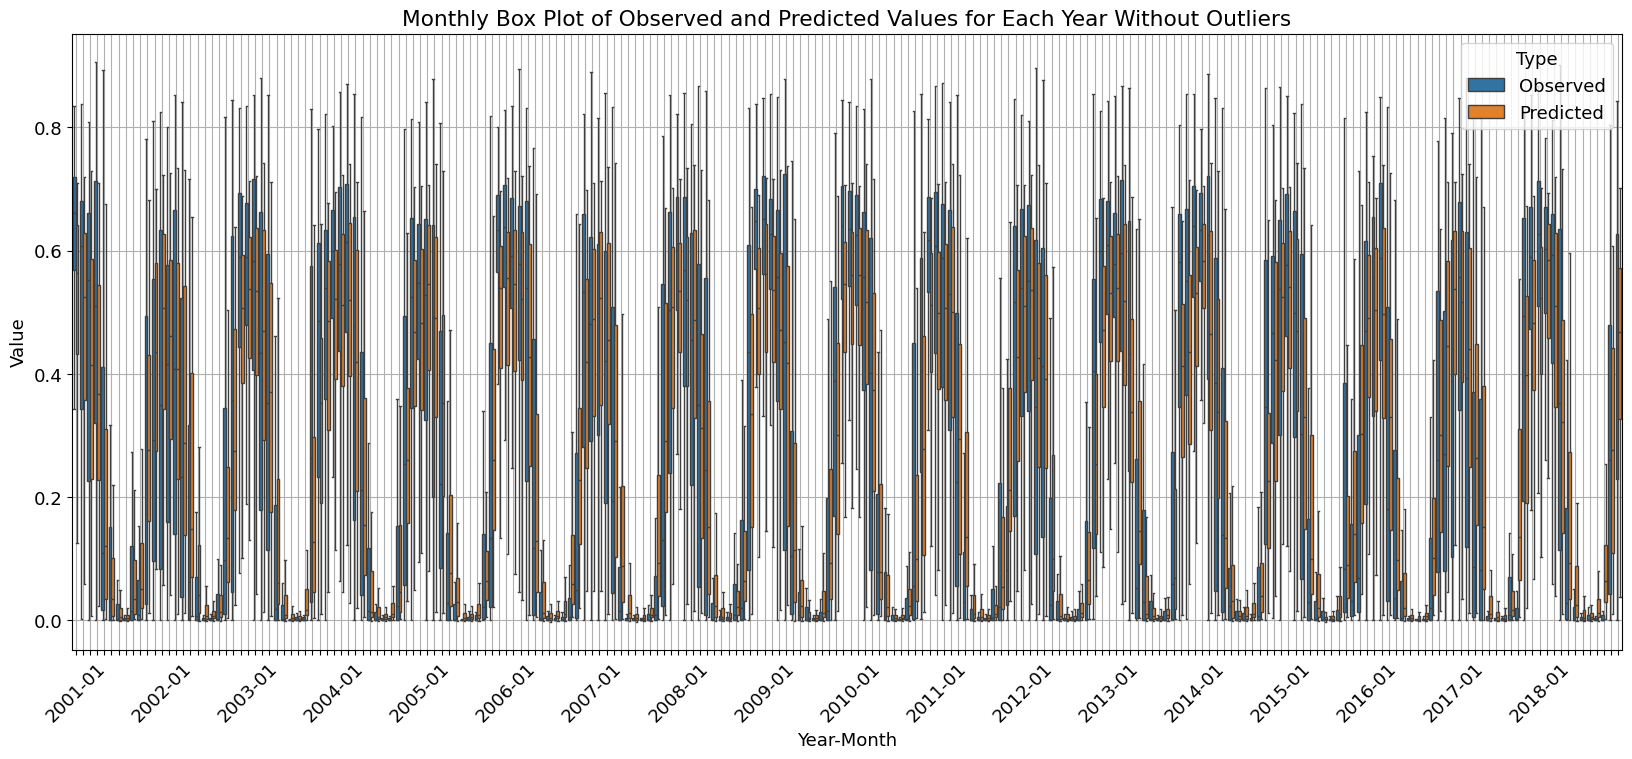

In [62]:
plot_box_yearwise_obs_pred(0)